In [1]:
# Importing Pandas, a data processing and CSV file I/O libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # Seaborn is a Python data visualization library based on matplotlib.
%matplotlib inline

In [3]:
#Next, you read the dataset into a Pandas dataframe.
df_USAhousing = pd.read_csv('/content/USA_Housing_toy (2).csv')
# Show the first five row.

df_USAhousing.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545,6,7,4.09,23087,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79249,6,7,3.09,40173,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287,6,9,5.13,36882,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345,7,6,3.26,34310,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982,5,8,4.23,26354,6.309435e+05,USNS Raymond\nFPO AE 09386


In [4]:
# The isnull() method is used to check and manage NULL values in a data frame.
df_USAhousing.isnull().sum()

,0
Avg. Area Income,0
Avg. Area House Age,0
Avg. Area Number of Rooms,0
Avg. Area Number of Bedrooms,0
Area Population,0
Price,0
Address,0


In [5]:
# Pandas describe() is used to view some basic statistical details of a data frame or a series of numeric values.
df_USAhousing.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2.500000e+03
mean,68593.110000,5.977600,7.002800,3.989816,36032.883600,1.233117e+06
std,10696.973654,1.060919,1.040012,1.241848,9803.904231,3.547254e+05
min,17797.000000,3.000000,3.000000,2.000000,173.000000,3.114052e+04
25%,61461.000000,5.000000,6.000000,3.150000,29381.750000,9.937032e+05
50%,68709.000000,6.000000,7.000000,4.050000,36074.000000,1.235056e+06
75%,75869.000000,7.000000,8.000000,4.500000,42683.250000,1.467923e+06
max,107702.000000,9.000000,11.000000,6.500000,69592.000000,2.469066e+06


In [6]:
# Pandas info() function is used to get a concise summary of the dataframe.
df_USAhousing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              2500 non-null   int64  
 1   Avg. Area House Age           2500 non-null   int64  
 2   Avg. Area Number of Rooms     2500 non-null   int64  
 3   Avg. Area Number of Bedrooms  2500 non-null   float64
 4   Area Population               2500 non-null   int64  
 5   Price                         2500 non-null   float64
 6   Address                       2500 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 136.8+ KB


In [7]:
print(df_USAhousing,5)

      Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0                79545                    6                          7   
1                79249                    6                          7   
2                61287                    6                          9   
3                63345                    7                          6   
4                59982                    5                          8   
...                ...                  ...                        ...   
2495             70214                    6                          6   
2496             48640                    4                          9   
2497             64534                    4                          7   
2498             58337                    5                          6   
2499             78846                    6                          6   

      Avg. Area Number of Bedrooms  Area Population         Price  \
0                             4.09        

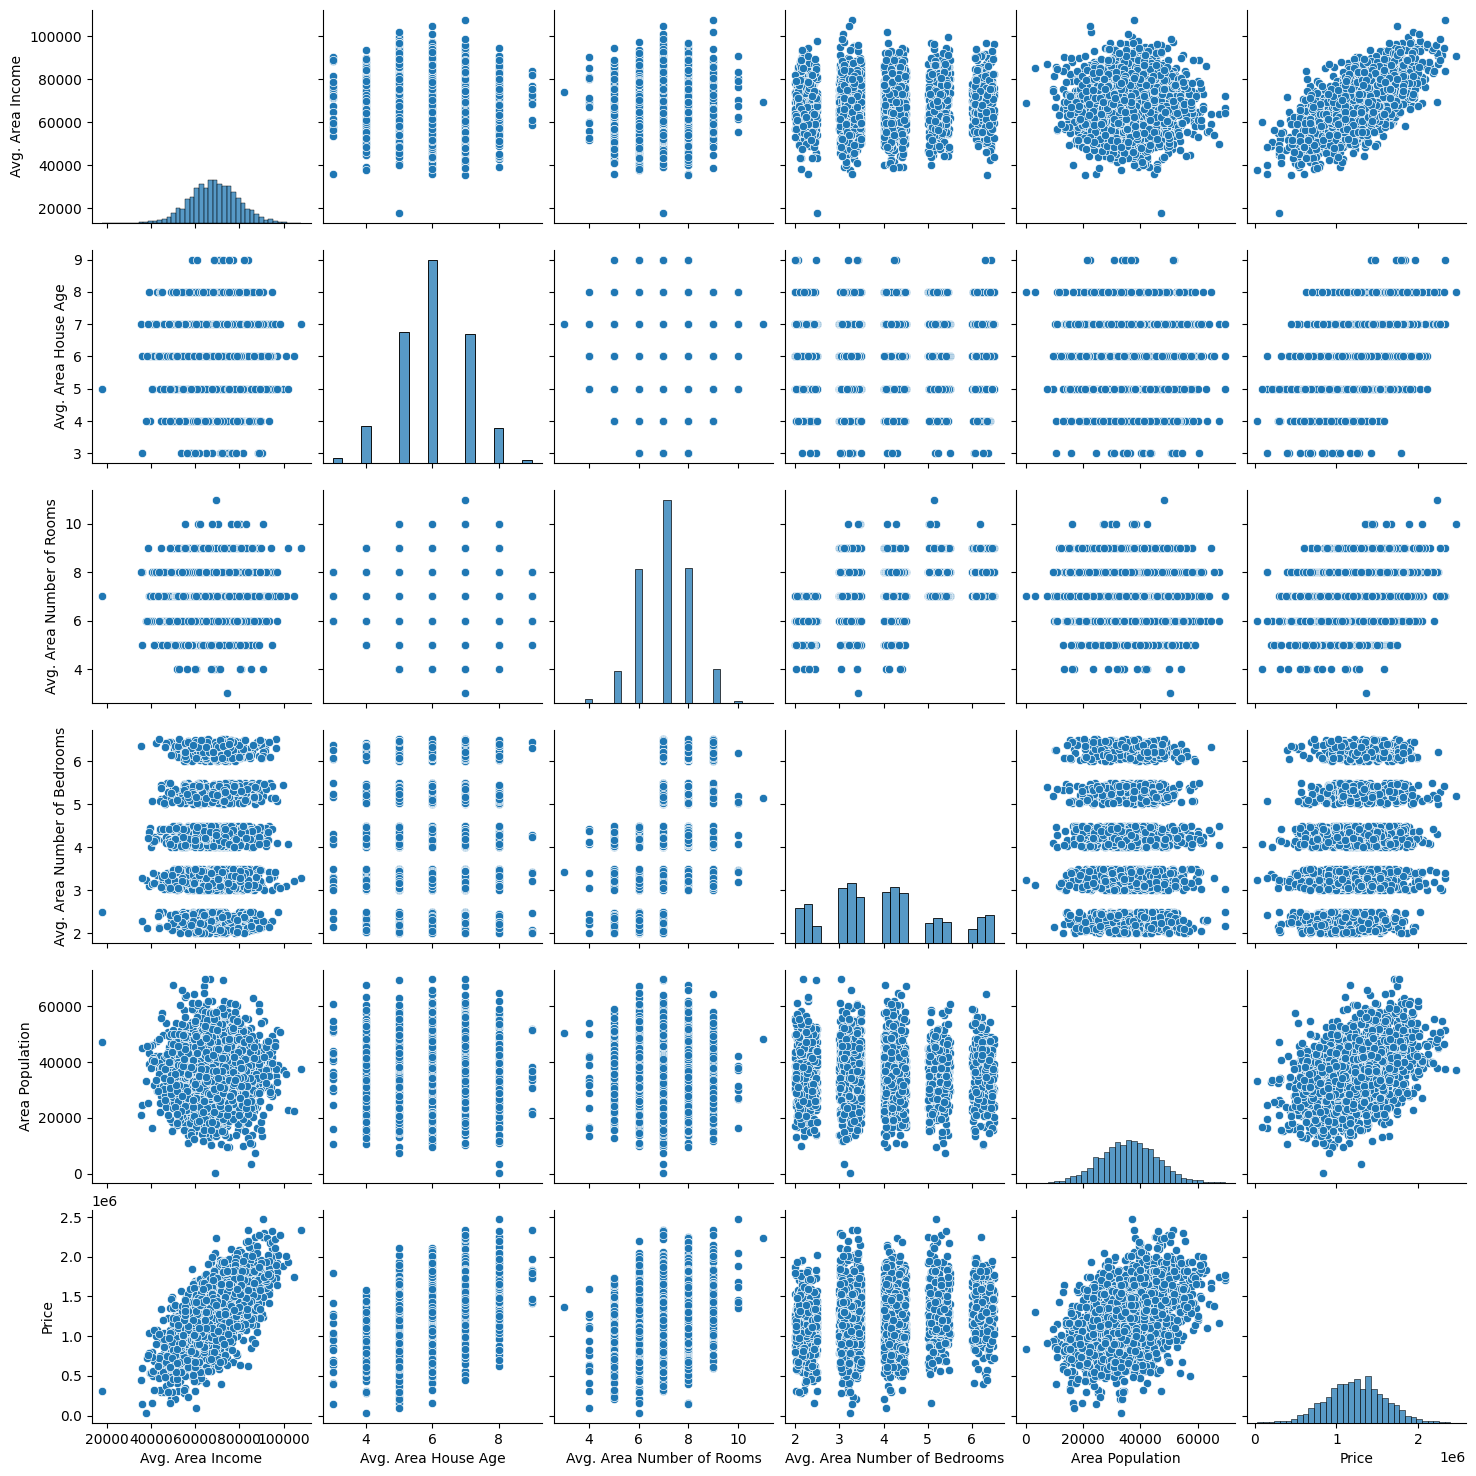

In [8]:
# Plot pairwise relationships in a dataset. By default, this function will create a grid of Axes such that each numeric variable in data will be
# shared across the y-axes across a single row and the x-axes across a single column.
sns.pairplot(df_USAhousing)

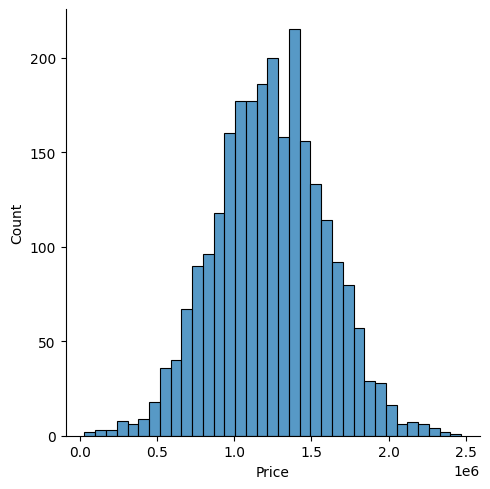

In [9]:
# It is used basically for univariant set of observations and visualizes it through a histogram i.e. only one observation
# and hence you choose one particular column of the dataset.
sns.displot(df_USAhousing['Price'])

<Axes: >

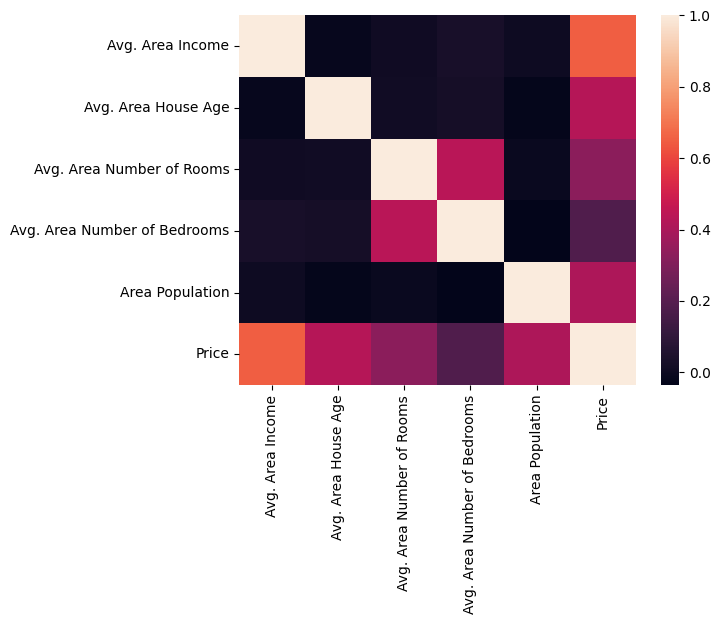

In [10]:
# The heatmap is a way of representing the data in a 2-dimensional form. The data values are represented as colors in the graph.
# The goal of the heatmap is to provide a colored visual summary of information.
sns.heatmap(df_USAhousing.corr(numeric_only=True))

In [11]:
X = df_USAhousing[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
               'Avg. Area Number of Bedrooms', 'Area Population']]
y = df_USAhousing['Price']

In [12]:
# Import train_test_split function from sklearn.model_selection
from sklearn.model_selection import train_test_split

# Split up the data into a training set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [13]:
# Import LinearRegression function from sklearn.model_selection
from sklearn.linear_model import LinearRegression

In [14]:
# LinearRegression fits a linear model with coefficients w = (w1, …, wp) to minimize the residual sum of squares between the observed targets
# in the dataset, and the targets predicted by the linear approximation.
lm = LinearRegression()

In [15]:
# Train the Linear Regression Classifer
lm.fit(X_train,y_train)

LinearRegression()

In [16]:
# print the intercept
print(lm.intercept_)

-2475717.145236709


In [17]:
# Pandas DataFrame is two-dimensional size-mutable, potentially heterogeneous tabular data structure with labeled axes (rows and columns).
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Avg. Area Income,21.613907
Avg. Area House Age,151067.014618
Avg. Area Number of Rooms,105139.535156
Avg. Area Number of Bedrooms,9643.180761
Area Population,15.170500


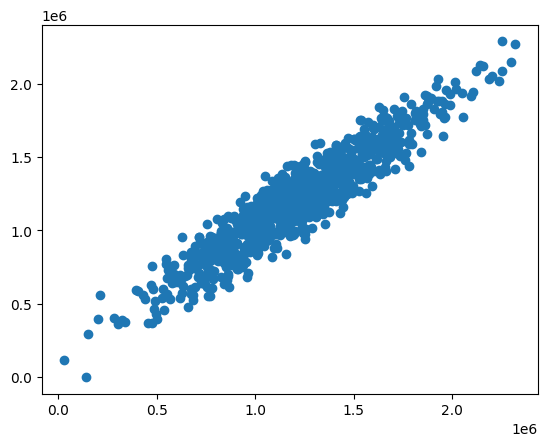

In [18]:
# Predict values based on linear model object.
predictions = lm.predict(X_test)
# Scatter plots are widely used to represent relation among variables and how change in one affects the other.
plt.scatter(y_test,predictions)

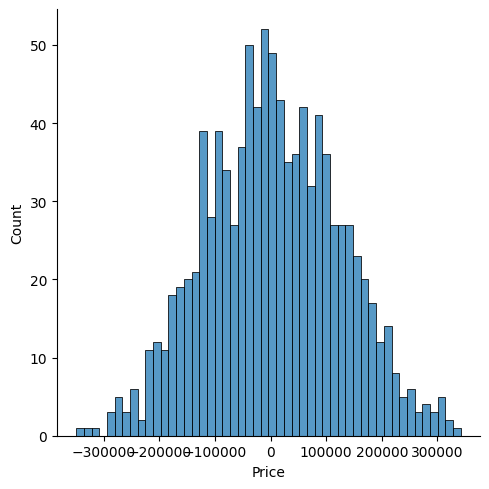

In [19]:
# It is used basically for univariant set of observations and visualizes it through a histogram i.e. only one observation
# and hence you choose one particular column of the dataset.
sns.displot((y_test-predictions),bins=50);

In [20]:
# Importing metrics from sklearn
from sklearn import metrics
# Show the values of MAE, MSE, RMSE
print('MAE:', round(metrics.mean_absolute_error(y_test, predictions), 2))
print('MSE:', round(metrics.mean_squared_error(y_test, predictions), 2))
print('RMSE:', round(np.sqrt(metrics.mean_squared_error(y_test, predictions)), 2))
print('R-squared:', round(metrics.r2_score(y_test, predictions), 4)*100,'%')

MAE: 97108.31
MSE: 14521493824.52
RMSE: 120505.16
R-squared: 88.44999999999999 %
